# Employee-Attrition Project

## References
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV
https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html#sphx-glr-auto-examples-model-selection-plot-grid-search-digits-py
https://scikit-learn.org/stable/modules/compose.html#combining-estimators
https://scikit-learn.org/stable/modules/grid_search.html#grid-search
https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

# 1. Import data and libraries

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

employee_df = pd.read_csv("Employee-Attrition.csv")
employee_df.head(4)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,2,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,0,8,3,3,8,7,3,0,No


In [14]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   HourlyRate                1470 non-null   int64 
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

## 1.1 Checking NA's 

In [15]:
employee_df.isnull().sum()

Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
dtype: int64

## 1.2 Checking to whitespaces

In [16]:
#checking to whitespaces 
employee_df.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

## 1.3 Removing whitespaces and checking unique values

In [17]:
# removing whitespaces and check
employee_df = employee_df.apply(lambda x: x.str.replace(" ","_") if x.dtypes == "object" else x)
employee_df.EducationField.unique()

array(['Life_Sciences', 'Other', 'Medical', 'Marketing',
       'Technical_Degree', 'Human_Resources'], dtype=object)

## 1.4 Creating dummies variables 

In [18]:
#create the dummies variables from employee dataframe
employee_df1 = pd.get_dummies(employee_df, drop_first=True)
employee_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EnvironmentSatisfaction            1470 non-null   int64
 5   HourlyRate                         1470 non-null   int64
 6   JobInvolvement                     1470 non-null   int64
 7   JobLevel                           1470 non-null   int64
 8   JobSatisfaction                    1470 non-null   int64
 9   MonthlyIncome                      1470 non-null   int64
 10  NumCompaniesWorked                 1470 non-null   int64
 11  PercentSalaryHike                  1470 non-null   int64
 12  PerformanceRating   

## 1.5 summary statistics table

In [19]:
employee_df1.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Manager,JobRole_Manufacturing_Director,JobRole_Research_Director,JobRole_Research_Scientist,JobRole_Sales_Executive,JobRole_Sales_Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Attrition_Yes
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463,0.457823,0.319728,0.282993,0.161224
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.254199,0.298279,0.226925,0.399112,0.415578,0.230891,0.498387,0.466530,0.450606,0.367863
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### The Attrition feature as dependent variable to our models.

***** Employee Attrition*****
No     1233
Yes     237
Name: Attrition, dtype: int64


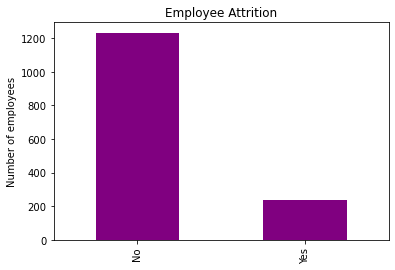

In [21]:
print("***** Employee Attrition*****")
print(employee_df['Attrition'].value_counts())

employee_df['Attrition'].value_counts().plot(kind='bar', color='purple')
plt.title('Employee Attrition')
plt.ylabel('Number of employees')
plt.show()

## 1.6 The heatmap of the correlation

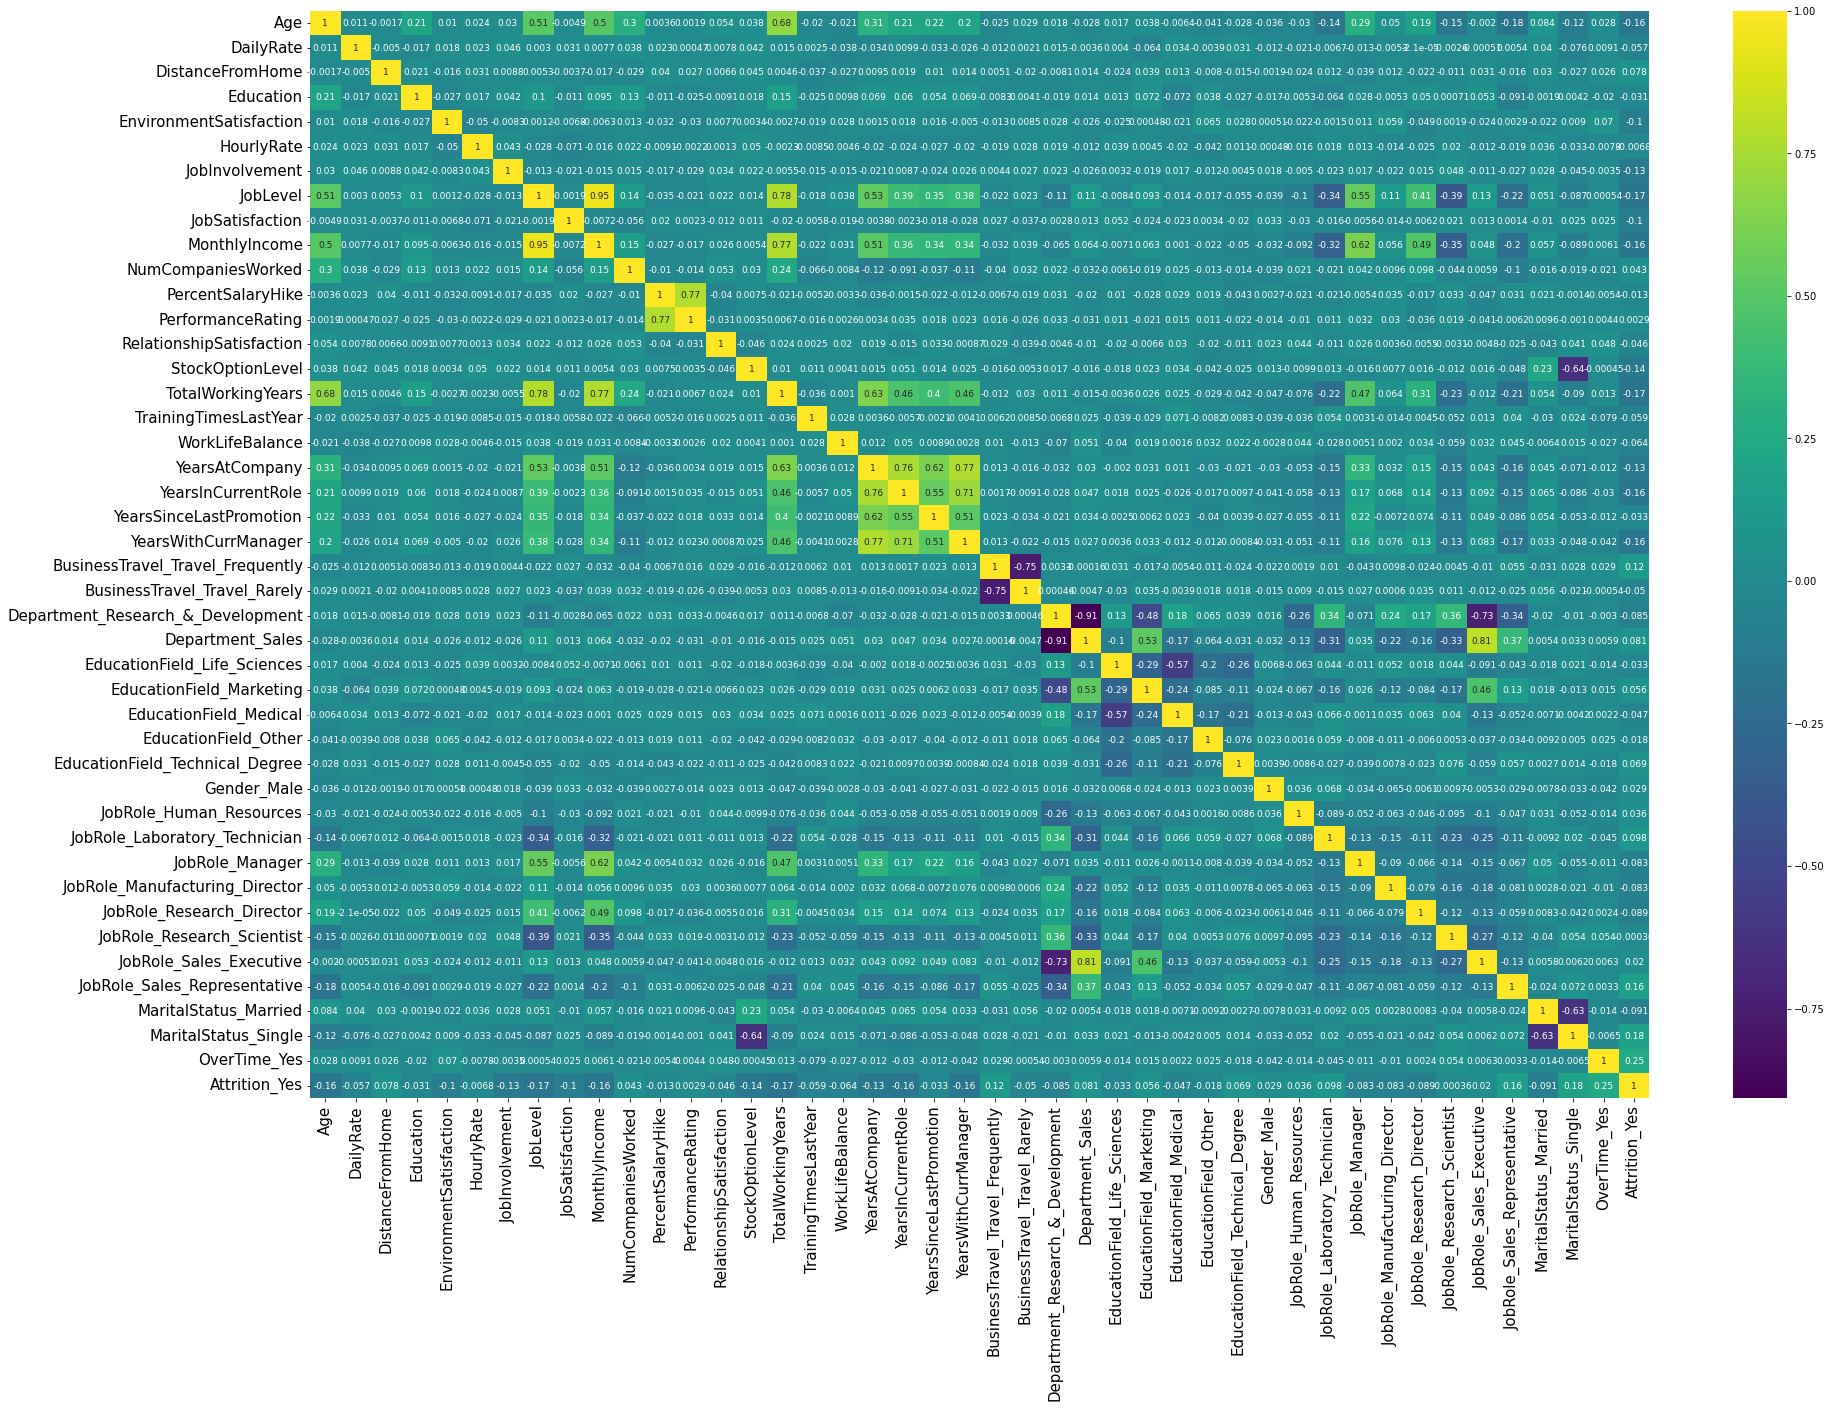

In [10]:
plt.subplots(figsize=(30,20))
hm=sns.heatmap(employee_df1.corr(),annot=True, annot_kws={"size":9}, cmap='viridis')
hm.set_xticklabels(hm.get_xmajorticklabels(), fontsize=15)
hm.set_yticklabels(hm.get_ymajorticklabels(), fontsize=15)
plt.show()

# 2. SVM classifier with GridSearchCV

- In the next classification model. I am enfocusing on predict if the employee will leave or stay in the job. then, I will use employee attrition as dependent variable 

In [22]:
#Training and Testing Split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report

X = employee_df1.drop(['Attrition_Yes'], axis=1)
y = employee_df1['Attrition_Yes']
X.shape

#split for training and testing 75/25 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#clf = SVC()

#Pipeline and composite estimator
model = Pipeline([('scaler', RobustScaler()), ('selector', SelectKBest(k=25)), ('model_svm', SVC())])

#Classifiers options: kernel (linear, rbf or poly), gamma (1, 0.1, 0.01, 0.001), C (1, 10, 50), degree (3, 4)
grid_param = [{"model_svm__kernel": ["rbf"], "model_svm__gamma":[1, 0.1, 0.01, 0.001], "model_svm__C": [1,10,50]},
              {"model_svm__kernel": ["poly"], "model_svm__gamma":[1, 0.1, 0.01, 0.001], "model_svm__C": [1,10,50], "model_svm__degree":[3,4]}]
# {"model_svm__kernel": ["linear"], "model_svm__C": [1,10,50]}, 

scores = ["precision", "recall"]
for score in scores :
    print("Tuning hyper-parameters for %s" % score)
    print()
    
    # GridSearchCV implementation with SVM classifier
    grid_search = GridSearchCV(model, grid_param, cv=5, scoring="accuracy", return_train_score=True)
    grid_search.fit(X_train, y_train)
    
    print("Best parameters")
    print("Best parameters: {}\n". format(grid_search.best_params_))
    print("Best model score")
    print("Best model cross-validation score: {:.2f}\n".format(grid_search.best_score_))
    print("Best estimator")
    print("Best estimator: {}\n". format(grid_search.best_estimator_))
    print("Grid score for all the models based on CV:\n")
    print()
    means = grid_search.cv_results_["mean_test_score"]
    stds = grid_search.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()
    
    print("Detailed classification report:")
    print()
    print("")
    #grid_search_best = grid_search.best_estimator_
    y_true, y_pred = y_test, grid_search.predict(X_test)
    print("***** Tuned Model Stats*****")
    print(classification_report(y_true, y_pred, target_names=['class 0','class 1']))

Tuning hyper-parameters for precision

Best parameters
Best parameters: {'model_svm__C': 10, 'model_svm__gamma': 0.01, 'model_svm__kernel': 'rbf'}

Best model score
Best model cross-validation score: 0.86

Best estimator
Best estimator: Pipeline(steps=[('scaler', RobustScaler()), ('selector', SelectKBest(k=25)),
                ('model_svm', SVC(C=10, gamma=0.01))])

Grid score for all the models based on CV:


0.828 (+/-0.007) for {'model_svm__C': 1, 'model_svm__gamma': 1, 'model_svm__kernel': 'rbf'}
0.848 (+/-0.024) for {'model_svm__C': 1, 'model_svm__gamma': 0.1, 'model_svm__kernel': 'rbf'}
0.828 (+/-0.003) for {'model_svm__C': 1, 'model_svm__gamma': 0.01, 'model_svm__kernel': 'rbf'}
0.828 (+/-0.003) for {'model_svm__C': 1, 'model_svm__gamma': 0.001, 'model_svm__kernel': 'rbf'}
0.830 (+/-0.015) for {'model_svm__C': 10, 'model_svm__gamma': 1, 'model_svm__kernel': 'rbf'}
0.828 (+/-0.024) for {'model_svm__C': 10, 'model_svm__gamma': 0.1, 'model_svm__kernel': 'rbf'}
0.860 (+/-0.033) for

		*****Classification Report*****

              precision    recall  f1-score   support

     class 0       0.90      0.98      0.94       320
     class 1       0.67      0.25      0.36        48

    accuracy                           0.89       368
   macro avg       0.78      0.62      0.65       368
weighted avg       0.87      0.89      0.86       368

		*****Output confussion matrix*****

Predicted    0   1
Actual            
0          314   6
1           36  12



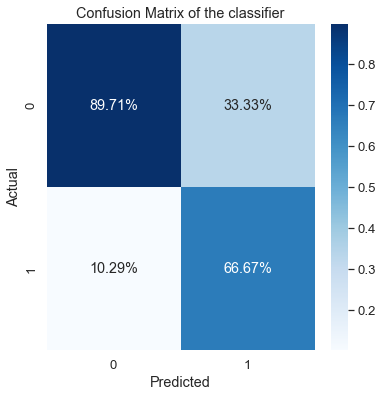

In [23]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix

print("\t\t*****Classification Report*****\n")
print(classification_report(y_true, y_pred, target_names=['class 0','class 1']))

cmat = confusion_matrix(y_true, y_pred, labels=grid_search.classes_)

df_cm = pd.DataFrame(cmat, columns=np.unique(y_true), index=np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

print("\t\t*****Output confussion matrix*****\n")
print(df_cm)
print()
fig=plt.figure(figsize = (6,6))
sns.set(font_scale=1.2)

sns.heatmap(df_cm/np.sum(df_cm), annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix of the classifier')
plt.show()

### Confusion Matrix

The best model got a cross-validation score = 0.86 and regarding to confusion matrix, of the 48 cases of attrition, the best model analyzed that 36 (10.29%) were not employee attrition cases, and of the 320 employees that will keep the job, the model predicted that 6 (33.33%) quitted their jobs. The all correct predicted was 326.


### Analysis of Precision/Recall

According to the classification report 90% percent("accuracy") of the correctly predicted cases turned out to be positive cases where employees said that they will keep their jobs. Whereas 98% ("recall") of the negative cases were successfully predicted by the model with a f1-score of 94%. 
